# Predicting Wildfire Intensity From Historical Data
- Authors: Pahul Brar, Fiona Chang, Lillian Milroy, & Darwin Zhang

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import requests
import zipfile
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Summary
This study employing a linear regression model to predict wildfire intensity in Australian regions aims to draw parallels with British Columbia's escalating wildfire risk due to climate-related weather. Using a dataset encompassing fire-related variables since 2005, including fire area, brightness, and radiative power, the analysis reveals a strong positive correlation between fire area and mean radiative power. The model demonstrates good fit and offers potential applications in wildfire management and prediction.

## Introduction
British Columbia is well-known for having a moderate climate associated with its beautiful, temperate rainforests; but in recent years, climate-related weather extremes in the region have caused a significant increase in forest fires (DellaSala et al. 2011; Parisien et al. 2023). The rapid onset of the problem, in conjunction with its unprecedented magnitude, has left British Columbians vulnerable as provincial authorities struggle to develop infrastructure capable of addressing the frequency and severity of the fires (Parisien et al. 2023). While inland residents face a heightened risk of losing their lives, homes, and loved ones to wildfires, the resulting smoke influences air quality throughout the province, posing profound health risks (Cascio 2018).

While rates of climate-related fire events are projected to increase globally, due to the composition of its ecological landscape, Australia is a nation that is well accustomed to battling wildfires (Jones et al. 2022; Bowman et al. 2018). There is notable overlap between the terrestrial biomes present in both Australia and B.C., particularly in the unique temperate coastal regions steeped with flammable vegetation, and the semi-arid inland deserts (Dickman 2018; Bowman et al. 2018). Given its proximity to the equator, Australia’s North coast exhibits fewer similarities to B.C (Dickman 2018; DellaSala et al. 2011). However, a shift in the B.C. climate precipitated by rising temperatures is occurring; some of the drier inland areas are beginning to mimic the ecological conditions found on Australia’s North coast.

Here, we attempt to predict the intensity of wildfires in regions across Australia that exhibit ecological similarities to B.C. in the hopes that the model can be adapted for provincial use. The four highest temperatures over the last century in B.C. have all been recorded within the last seven years; the swiftness with which the local climate is changing has caused a scarcity of regional data to anticipate the state of future wildfire seasons (Parisien et al. 2023). We will be using a [dataset](https://github.com/Call-for-Code/Spot-Challenge-Wildfires/raw/main/data/Nov_10.zip) processed by IBM containing information collected via thermal imaging technology since 2005, which captures a number of variables such as region, daily sum of estimated fire area, brightness, and radiative power (Hamann and Schmude 2021; Krook 2021). For the purposes of this analysis, fire intensity will be represented by estimated daily regional area affected by fire. The rarity of the terrestrial biomes shared by both regions, coupled with Australia’s experience in wildfire management, present B.C. with an unlikely learning opportunity: it is possible that the wealth of historical data on Australian wildfires could be used to help B.C. predict forest fire intensity (Bowman et al. 2018; DellaSala et al. 2011). A sentiment that has been shared among Canadian researchers is that the abilities of machine learning tools are not taken advantage of by the Canadian Wildland Fire Information System (Purcell 2023). Current wildfire research efforts should be supplemented by modern technological methods; hopefully, they can be used to preempt the trajectory of wildfire prevalence, and make life-saving modifications to infrastructure. 

## Methods
### Data 
Our dataset contains information about wildfires throughout seven geographic regions in Australia, starting from the year 2005. It can be located in its entirety [on GitHub](https://github.com/Call-for-Code/Spot-Challenge-Wildfires/tree/main), and [this](https://github.com/Call-for-Code/Spot-Challenge-Wildfires/blob/main/data/misc/NSW_Wildfires_Temperature.csv) is the specific csv containing the data used for our analysis (Hamann and Schmude 2021; Krook 2021).

There are 26,404 rows and 9 columns. Definitions for each variable, obtained from the [original data documentation](https://github.com/Call-for-Code/Spot-Challenge-Wildfires/blob/main/data/Readme_Docs_Wildfires-Datasets_2020-11.pdf), are provided below.


- **Region**: The respective regions as outlined above for which the data was/is aggregated.
- **Date**: Day of acquisition of the data. All dates are in UTC and provide the data for 24 hours ahead.
- **Estimated_fire_area**: Daily sum of estimated fire area for presumed vegetation fires with a confidence level of larger than 75% for a given region. To obtain this estimated area the scan pixel size was multiplied by the along track pixel size. The nominal unit for the area is in kmA2
- **Mean_estimated_fire_brightness**: Daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level of larger than 75% for a given region. The data was obtained by averaging the means of both the brightness temperature 21 (obtained from channel 21/22) and brightness temperature 31 (obtained from channel 31). The units are in Kelvin.
- **Mean_estimated_fire_radiative_power**: Daily mean (by flagged fire pixels(=count)) of estimated radiative power for presumed vegetation fires with a confidence level of larger than 75% for a given region. The units are in megawatts.
- **Mean_confidence**: Daily mean of confidence for presumed vegetation fires with a confidence level of larger than 75% for a given region. This value is based on a collection of intermediate algorithm quantities used in the detection process. It is intended to help users gauge the quality of individual hotspot/fire pixels. Confidence estimates range between 0 and 100%
- **Std_confidence**: Standard deviation of estimated fire radiative power if available. The units are in megawatts.
- **Var_confidence**: Variance of estimated fire radiative power if available. The units are in megawatts.
- **Count**: Daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region. 
- **Replaced**: Indicates with an "R" whether the data has been replaced with higher quality data when available (usually with a 2-3 month lag). Replaced data has slightly higher quality but it is expected to be of very minor impact in this contest. Please note that most corrections in the replaced data are associated with the precise geolocation and the fire classification. Most notably there is no classification for the type of fire, which means that all fires are assumed to be vegetation fires. Comparing the data from 2005 to 2020 more than 98% of the fires were eventually classified to be presumed vegetation fires. 

The data was spatially averaged to the following 7 regions in Australia:
- NSW: New South Wales
- NT: Northern Territory
- QL: Queensland
- SA: South Australia 
- TA: Tasmania
- Vl: Victoria
- WA: Western Australia

### Analysis
A linear regression model was trained to predict the intensity of forest fires in Australia, measured by estimated total fire area (the column estimated_fire_area), using the variables count, mean confidence, Mean estimated fire brightness, and mean estimated fire radiative power. We opted to use a linear regression model due to its interpretability and the continuous nature of our target variable. Prior to fitting the model, the numeric variables were isolated and standardized so that the coefficients we obtained would not be influenced by scale differences in the variables. Only four of the eight potential predictor variables were used to train the model: non-numeric variables were eliminated, and then a correlation analysis was performed to identify which features present in the remaining data would be good predictors of the target variable. The data was divided into training and test sets using an 80/20 split. The model was first trained on the training data, and then used to make predictions on the test set. This analysis was performed using the Python Programming Language (Van Rossum and Drake 2009) and the following Python packages: requests (Reitz 2011), zipfile (Van Rossum and Drake 2009), numpy (Harris et al. 2020), Pandas (McKinney 2010), matplotlib (Hunter 2007), scikit-learn (Pedregosa et al. 2011), and seaborn (Waskom 2021).

## Results & Discussion
Good model fit was indicated by the evaluation metrics we selected, RMSE (72.95) and R-squared (0.9476). A strong positive linear relationship between the target variable and the predictors Count and Mean_estimated_fire_radiative_power can be observed in the line and residual plots accompanying the analysis. The predictors Mean_estimated_fire_brightness and Mean_confidence have negative coefficients, indicating a decrease in the value of these features precipitates an increase in the value of the target variable estimated_fire_area.

The findings are consistent with our expectations, as regions with greater radiative power correlate with larger wildfire areas. However, the negative coefficient for mean estimated fire brightness and confidence suggests an inverse relationship, implying that lower brightness and confidence intervals are associated with larger fire areas.

The prediction model may have significant implications for wildfire management and prediction, aiding in the early detection and estimation of wildfire occurrences. This method can assist wildlife management services and authorities in better understanding the nature of wildfires. Integration of this approach can also help reduce risks posed by wildfires to ecosystems, communities, and public health.

For future iterations, it's worth considering further exploration of the correlation between mean estimated fire brightness and confidence, as this unexpected relationship may offer insights into underlying factors. Additionally, exploring additional variables such as area and land characteristics, such as dryness or the presence of old growth, could provide valuable insights into their influence on wildfire occurrence.


In [2]:
# Data is openly available from Github 
url = "https://github.com/Call-for-Code/Spot-Challenge-Wildfires/raw/main/data/Nov_10.zip"
# Finding the data folder in the main directory
target_directory_for_data = os.path.join(os.path.dirname(os.getcwd()), 'data')
# Creating a folder for the Raw data
raw_folder =os.path.join(target_directory_for_data, 'Raw')

if not os.path.exists(raw_folder):
    os.makedirs(raw_folder)

# The zip file is then added to the data folder via the path
zip_file = os.path.join(raw_folder, 'Nov_10.zip')

# Now we add the contents to the folder
response = requests.get(url)

with open(zip_file, 'wb') as f:
    f.write(response.content)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(raw_folder)

In [3]:
# Define the path to the folder containing the CSV file
folder_path = os.path.join(raw_folder, 'Nov_10')

# Define the path to the CSV file
csv_file_path = os.path.join(folder_path, 'Historical_Wildfires.csv')

# Read the CSV file
df = pd.read_csv(csv_file_path)
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               26406 non-null  object 
 1   Date                                 26406 non-null  object 
 2   Estimated_fire_area                  26406 non-null  float64
 3   Mean_estimated_fire_brightness       26406 non-null  float64
 4   Mean_estimated_fire_radiative_power  26406 non-null  float64
 5   Mean_confidence                      26406 non-null  float64
 6   Std_confidence                       24199 non-null  float64
 7   Var_confidence                       24199 non-null  float64
 8   Count                                26406 non-null  int64  
 9   Replaced                             26406 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.0+ MB


In [5]:
# Clean data from null values

df_clean = df.dropna()

In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24199 entries, 0 to 26405
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               24199 non-null  object 
 1   Date                                 24199 non-null  object 
 2   Estimated_fire_area                  24199 non-null  float64
 3   Mean_estimated_fire_brightness       24199 non-null  float64
 4   Mean_estimated_fire_radiative_power  24199 non-null  float64
 5   Mean_confidence                      24199 non-null  float64
 6   Std_confidence                       24199 non-null  float64
 7   Var_confidence                       24199 non-null  float64
 8   Count                                24199 non-null  int64  
 9   Replaced                             24199 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.0+ MB


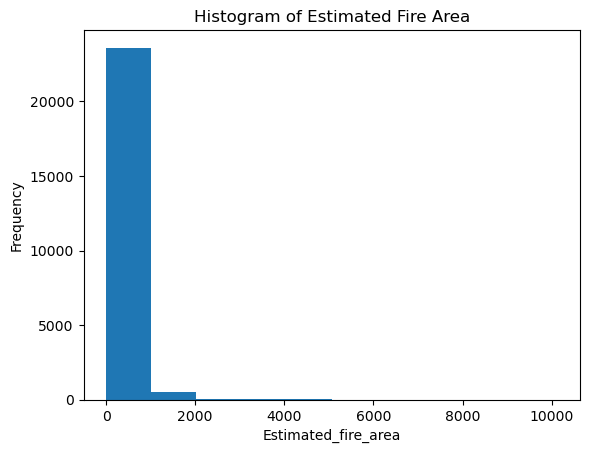

In [7]:
# EDA Visualization 1

df_clean['Estimated_fire_area'].plot(kind = 'hist', bins=10)

# Add labels and title
plt.xlabel('Estimated_fire_area')
plt.ylabel('Frequency')
plt.title('Histogram of Estimated Fire Area')

# Show the plot
plt.show()

In [8]:
print(df.describe())

       Estimated_fire_area  Mean_estimated_fire_brightness   
count         26406.000000                    26406.000000  \
mean            144.297966                      319.662078   
std             314.453847                        8.862005   
min               1.000000                      290.700000   
25%               8.911875                      313.933333   
50%              38.434091                      319.784412   
75%             146.951278                      325.403144   
max           10120.943170                      381.950000   

       Mean_estimated_fire_radiative_power  Mean_confidence  Std_confidence   
count                         26406.000000     26406.000000    24199.000000  \
mean                             83.621258        87.574735        7.228302   
std                              67.510022         4.371972        1.995221   
min                               0.000000        76.000000        0.000000   
25%                              44.150391    

In [9]:
print(df['Region'].value_counts().reset_index())

  Region  count
0     WA   5627
1     QL   5533
2     NT   5053
3    NSW   4623
4     VI   2176
5     SA   1990
6     TA   1404


In [10]:
# Navigate to the parent directory of the current directory (where the notebook resides)
parent_directory = os.path.dirname(os.getcwd())

# Define the path to the preexisting "data" folder
data_folder = os.path.join(parent_directory, 'data')

# Create the "processed_data" folder within the "data" folder if it doesn't exist
processed_data_folder = os.path.join(data_folder, 'Processed Data')
if not os.path.exists(processed_data_folder):
    os.makedirs(processed_data_folder)

# Define the file path to save the DataFrame
processed_data_file = os.path.join(processed_data_folder, 'Historical_Wildfires.csv')

# Save the DataFrame to CSV
df.to_csv(processed_data_file, index=False)

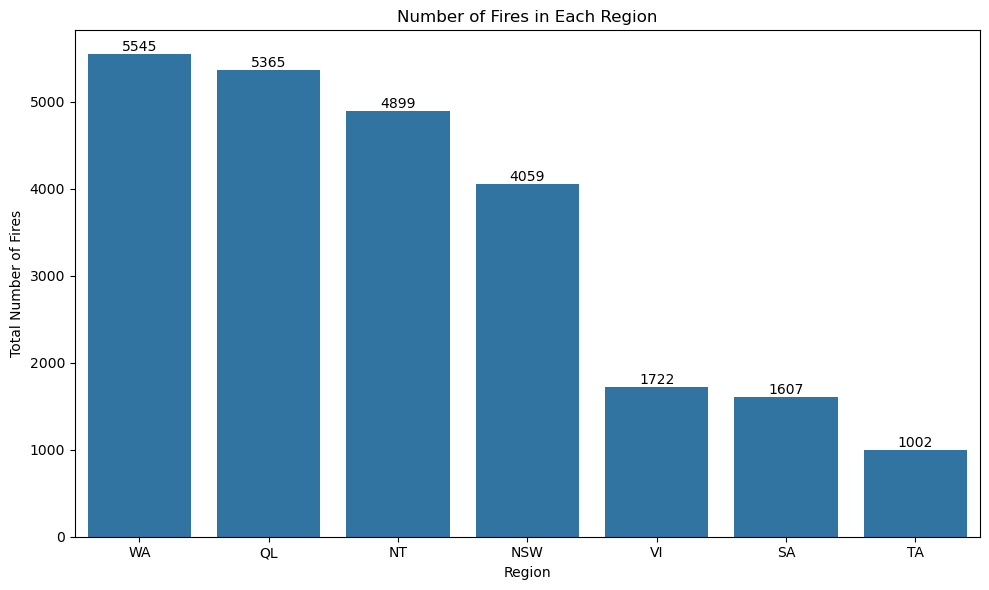

In [11]:
# Viz 2: Fire Prevalence Across Regions

fires_by_region = df_clean['Region'].value_counts().reset_index(name = 'total_fires').rename(columns={'index': 'Region'})

plt.figure(figsize = (10, 6))
sns.barplot(x = 'Region', y = 'total_fires', data = fires_by_region)

for index, row in fires_by_region.iterrows():
    plt.text(index, row['total_fires'], str(row['total_fires']), ha = 'center', va = 'bottom')

plt.xlabel('Region')
plt.ylabel('Total Number of Fires')
plt.title('Number of Fires in Each Region')

plt.tight_layout()
plt.show()

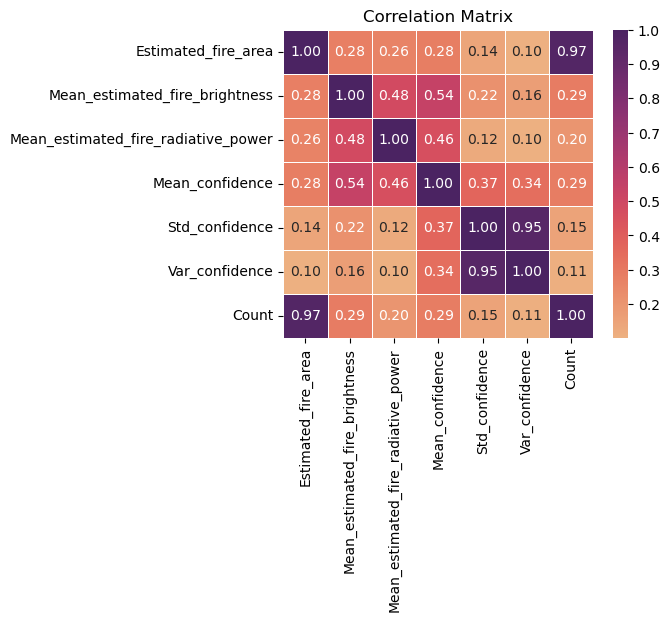

Count                                  0.968032
Mean_confidence                        0.283315
Mean_estimated_fire_brightness         0.278935
Mean_estimated_fire_radiative_power    0.263909
Std_confidence                         0.143527
Var_confidence                         0.101616
Name: Estimated_fire_area, dtype: float64

In [12]:
np.random.seed(238)
# Correlation analysis to help with feature selection 
# Drop non-numeric columns
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

# Standardize data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_df, columns=numeric_df.columns)

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Relevant features based off of correlation matrix
target_variable = 'Estimated_fire_area'
relevant_features = correlation_matrix[target_variable].sort_values(ascending=False)[1:]
relevant_features

In [13]:
# Sort features (X) and target variable (Y)
X = df_clean[['Count', 'Mean_confidence', 'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power']]
y = df_clean['Estimated_fire_area']

# Split test, train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)

# Linear regression model 
model = LinearRegression()

# Fit model into training data
model.fit(X_train, y_train)

# Make predictions on testing
y_pred = model.predict(X_test)

# Evaluating model 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

r_squared = model.score(X_test, y_test)
print("R-squared score:", r_squared)

RMSE: 72.95431197666012
R-squared score: 0.9475990949356267


In [14]:
# Model coefficients
coefficients = model.coef_

# Display coefficients in a dataframe
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print(coefficients_df)

                               Feature  Coefficient
0                                Count     2.011837
1                      Mean_confidence    -1.512177
2       Mean_estimated_fire_brightness    -1.573120
3  Mean_estimated_fire_radiative_power     0.487834


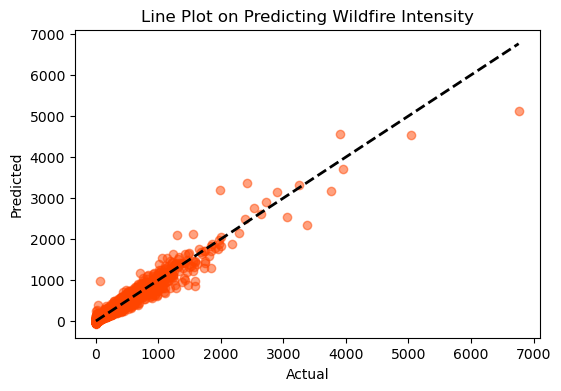

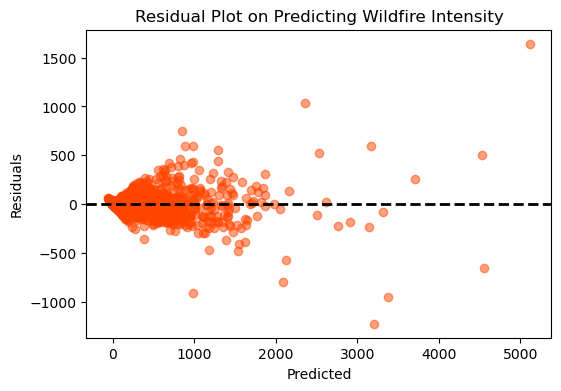

In [15]:
# Line plot for regression model 
plt.figure(figsize=(6, 4))
plt.plot(y_test, y_pred, 'o', color='orangered', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Line Plot on Predicting Wildfire Intensity')
plt.show()

# Residual plot for regression model
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, color='orangered', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot on Predicting Wildfire Intensity')
plt.show()

## References
Bowman, D. M. J. S., Daniels, L. D., Johnston, F. H., Williamson, G. J., Jolly, W. M., Magzamen, S., Rappold, A. G., Bräuer, M., & Henderson, S. B. (2018). Can Air Quality Management Drive Sustainable Fuels Management at the Temperate Wildland–Urban Interface? Fire, 1(2), 27. https://doi.org/10.3390/fire1020027

Cascio, W. E. (2018). Wildland fire smoke and human health. Science of the Total Environment, 624, 586–595. https://doi.org/10.1016/j.scitotenv.2017.12.086

DellaSala, D. A., Alaback, P. B., Spribille, T., Von Wehrden, H., & Nauman, R. S. (2011). Just what are temperate and boreal rainforests? Island Press/Center for Resource Economics eBooks (pp. 1–41). https://doi.org/10.5822/978-1-61091-008-8_1

Dickman, C. R. (2018). Biodiversity in Australia: An Overview: Selected Countries in the Americas and Australia. Global Biodiversity. 10.1201/9780429433634-12

Hamann, H., & Schmude, J. (2021). IBM Developer. https://developer.ibm.com/data/spot-challenge-wildfires/

Harris, C.R. et al., 2020. Array programming with NumPy. Nature, 585, pp.357–362.

Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95.

Jones, M. W., Abatzoglou, J. T., Veraverbeke, S., Andela, N., Lasslop, G., Forkel, M., Smith, A. J. P., Burton, C., Betts, R., Van Der Werf, G. R., Sitch, S., Canadell, J. G., Santín, C., Kolden, C. A., Doerr, S. H., & Quéré, C. L. (2022). Global and regional trends and drivers of fire under climate change. Reviews of Geophysics, 60(3). https://doi.org/10.1029/2020rg000726

Krook, D. (2021). Spot Challenge Wildfires. GitHub. https://github.com/Call-for-Code/Spot-Challenge-Wildfires/tree/main

McKinney, Wes. 2010. “Data Structures for Statistical Computing in Python.” In Proceedings of the 9th Python in Science Conference, edited by Stéfan van der Walt and Jarrod Millman, 51–56.

Parisien, M., Barber, Q. E., Bourbonnais, M. L., Daniels, L. D., Flannigan, M. D., Gray, R. W., Hoffman, K. M., Jain, P., Stephens, S. L., Taylor, S., & Whitman, E. (2023). Abrupt, Climate-induced Increase in Wildfires in British Columbia Since the Mid-2000s. Communications Earth & Environment, 4(1). https://doi.org/10.1038/s43247-023-00977-1

Pedregosa, F. et al., 2011. Scikit-learn: Machine learning in Python. Journal of machine learning research, 12(Oct), pp.2825–2830.

Purcell, R. (2023). Forest Fire Prediction Frameworks using Federated Learning and Internet of Things (IoT) [MSc Thesis, Dalhousie University]. https://dalspace.library.dal.ca/bitstream/handle/10222/82847/RichardJPurcell2023.pdf?sequence=5&isAllowed=y

Reitz, Kenneth. 2011. Requests: HTTP for Humans. https://requests.readthedocs.io/en/master/.

Van Rossum, Guido, and Fred L. Drake. 2009. Python 3 Reference Manual. Scotts Valley, CA: CreateSpace.

Waskom, M. L. (2021).Seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021, https://doi.org/10.21105/joss.03021.